In [1]:
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [2]:
os.chdir('C:/Users/Sushant/Documents/newspaper-word-count/Python_DS')
%pwd

'C:\\Users\\Sushant\\Documents\\newspaper-word-count\\Python_DS'

In [3]:
#Convert to time series data
data = pd.read_csv('nottem.csv', header =0, 
                   names =['Month', 'Temp'])
data.head()

,Month,Temp
0,1,40.6
1,2,40.8
2,3,44.4
3,4,46.7
4,5,54.1


In [4]:
##Convert to time series by manually creating index
data = pd.Series(data['Temp'].values,
                     index = pd.date_range('31/01/1920' ,
                                           '31/12/1939',
                                           freq = 'M'))
data.tail()

1939-08-31    61.8
1939-09-30    58.2
1939-10-31    46.7
1939-11-30    46.6
1939-12-31    37.8
Freq: M, dtype: float64

# Implement seasonal decomposition and plot the data to see patterns

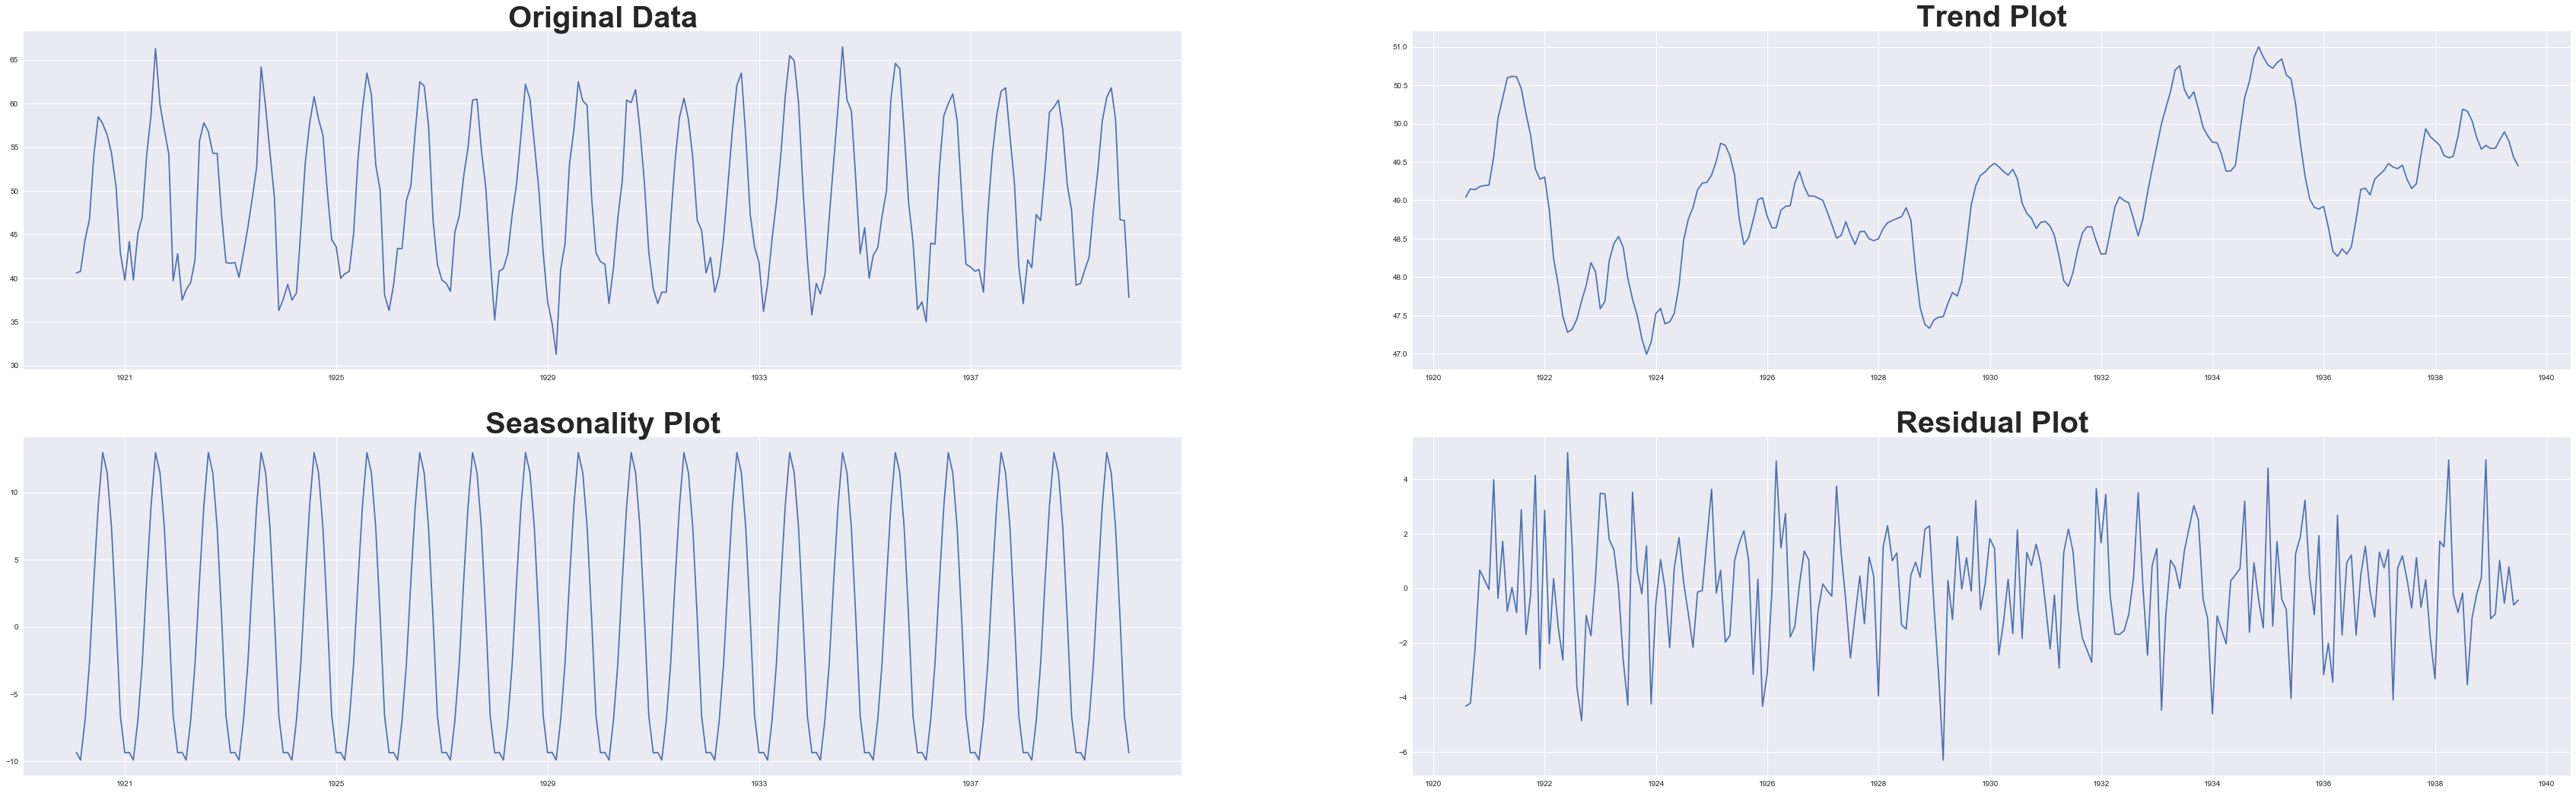

In [5]:
import statsmodels.tsa.seasonal as seas
decomp = seas.seasonal_decompose(data)

%matplotlib inline
fig = plt.figure(figsize=(60,18))
ax1 = fig.add_subplot(221, title = 'Trend Plot')
ax1.set_title('Original Data',fontweight="bold", size=40)
plt.plot(data)
ax2 = fig.add_subplot(222, title = 'Trend Plot')
ax2.set_title('Trend Plot',fontweight="bold", size=40)
plt.plot(decomp.trend)
ax3 =fig.add_subplot(223)
ax3.set_title('Seasonality Plot',fontweight="bold", size=40)
plt.plot(decomp.seasonal)
ax4 =fig.add_subplot(224)
ax4.set_title('Residual Plot',fontweight="bold", size=40)
plt.plot(decomp.resid)
plt.show()

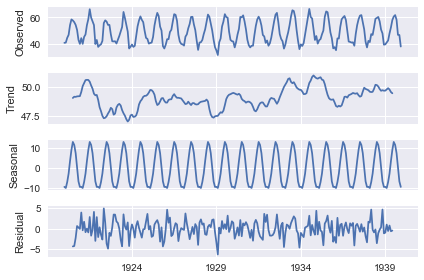

In [6]:
#There is also a easier way to see the above plot
decomp.plot()
plt.show()

# Now we use stldecompose package for further analysis and forecast

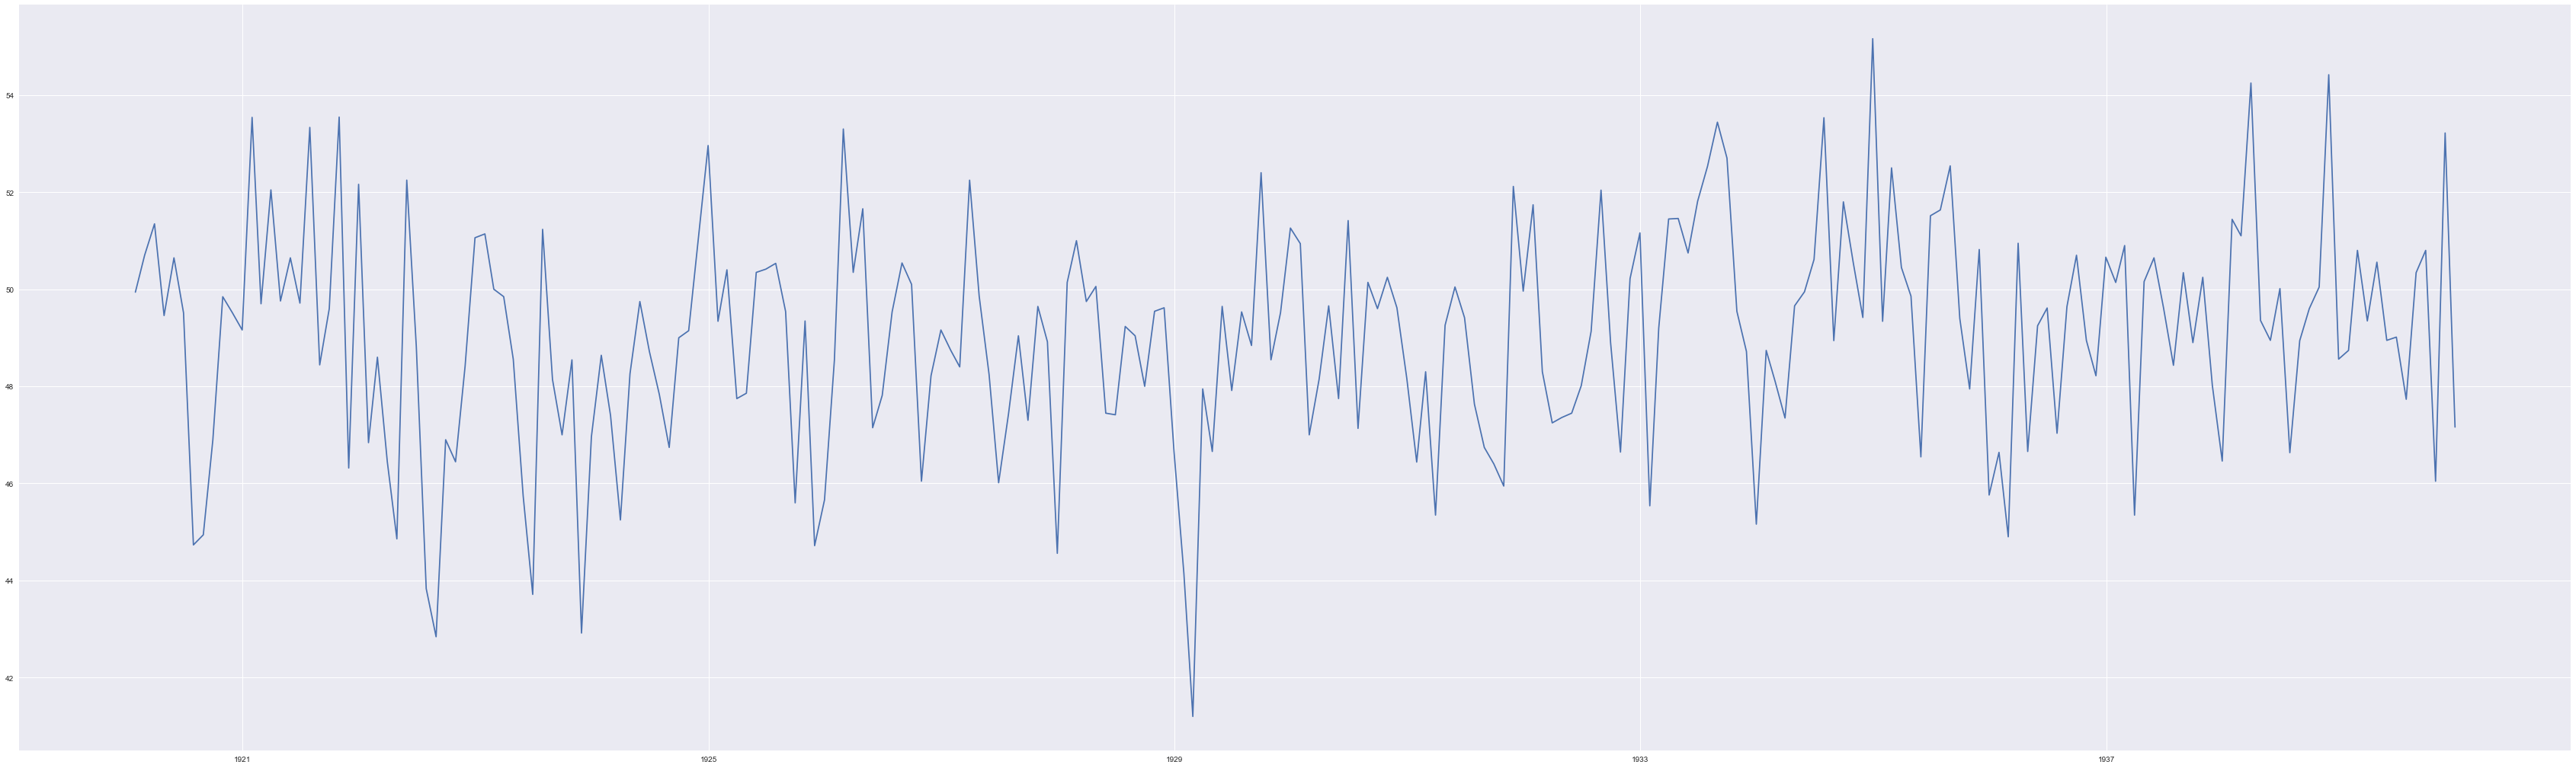

In [7]:
#remove seasonality from dataset
adjustdata = data-decomp.seasonal
fig = plt.figure(figsize=(60,18))
plt.plot(adjustdata)
plt.show()

In [8]:
import stldecompose as stld
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)
stl = stld.decompose(data, period =12)
fcast = stld.forecast(stl, steps=36 ,fc_func = seasonal_naive, seasonal = True)


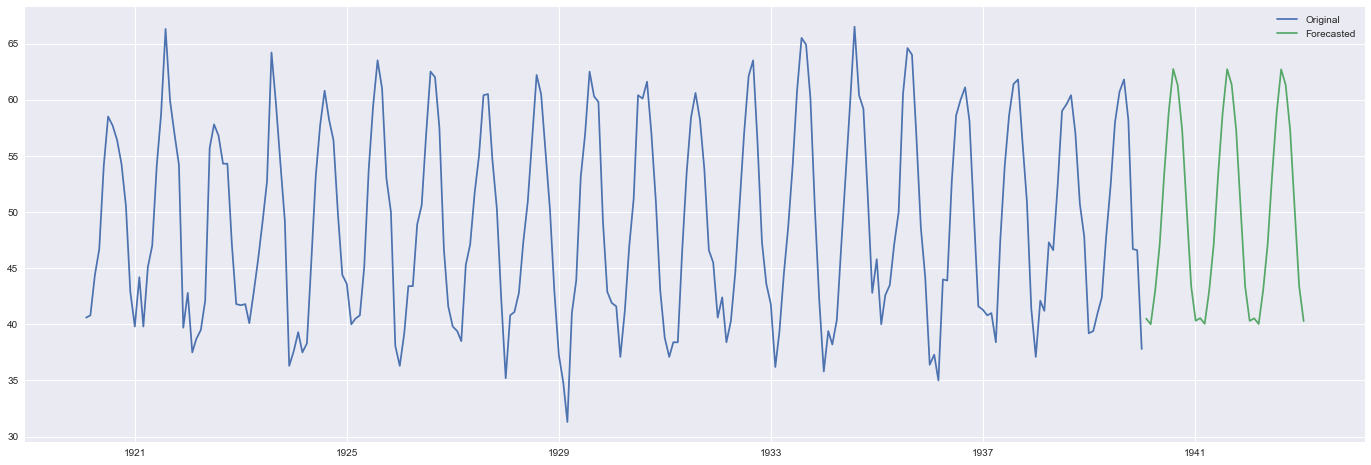

In [9]:
fig = plt.figure(figsize=(24, 8))
plt.plot(data, label = 'Original')
plt.plot(fcast, label = 'Forecasted')
plt.legend(loc = 'best')
plt.show()